<a href="https://colab.research.google.com/github/Dhairya18498/MIE1624_Assignment2/blob/main/parmar_1006859516_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up the Notebook

Please run the following two code cells to import the required data files and python files used in this notebook

In [1]:
!rm -rf MIE1624_Assignment2
!git clone https://github.com/Dhairya18498/MIE1624_Assignment2.git

Cloning into 'MIE1624_Assignment2'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 38 (delta 15), reused 25 (delta 6), pack-reused 0
Unpacking objects: 100% (38/38), 1.28 MiB | 5.57 MiB/s, done.


In [2]:
%cd MIE1624_Assignment2/
!ls

/content/MIE1624_Assignment2
clean_kaggle_data_2022.csv	       Ordinal_Classifier.py
kaggle_survey_2022_answer_choices.pdf  parmar_1006859516_assignment2.ipynb
main.py				       README.md
MIE1624-Assignment-2-Winter2023.pdf


# Importing Kaggle Survey Data

Let's begin by importing the data,

In [3]:
import pandas as pd
# from IPython.display import HTML

survey_df = pd.read_csv('clean_kaggle_data_2022.csv', encoding = 'latin1')

# survey_df_html = survey_df.to_html()
# display(HTML(survey_df_html))

survey_df.head()

<ipython-input-3-f1929ec17803>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  survey_df = pd.read_csv('clean_kaggle_data_2022.csv', encoding = 'latin1')


,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,Q29_Encoded,Q29_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,NaN,NaN
1,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,"Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,2.0,"20,000-29,999"
2,501,30-34,Man,Germany,No,Coursera,edX,NaN,NaN,NaN,...,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
3,787,70+,Man,Australia,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...",NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
4,1132,40-44,Man,United States of America,No,Coursera,NaN,Kaggle Learn Courses,NaN,Fast.ai,...,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...","Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,13.0,"200,000-299,999"


After having a look on the DataFrame, it can be seen that the first column "Duration (in seconds)" represent the amount of time in seconds the respondent took to complete the survey, which is irrelevant in the task of predicting the respondent's yearly compensation, hence it is dropped in the following cell. Also the first row of the DataFrame describes what the question is, we can remove that row and store it in a separate DataFrame, to have a mapping of the question numbers and their descriptions

In [4]:
from IPython.display import HTML
survey_df.drop(columns = [survey_df.columns[0]], inplace = True) ### since duraation of survey is not a relevant feature
survey_ques = pd.DataFrame(survey_df.loc[0])
survey_df.drop(0, inplace = True)
survey_ques.reset_index(inplace = True)
survey_ques_html = survey_ques.to_html()
display(HTML(survey_ques_html))

,index,0
0,Q2,What is your age (# years)?
1,Q3,What is your gender? - Selected Choice
2,Q4,In which country do you currently reside?
3,Q5,"Are you currently a student? (high school, university, or graduate)"
4,Q6_1,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera
5,Q6_2,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - edX
6,Q6_3,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses
7,Q6_4,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataCamp
8,Q6_5,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Fast.ai
9,Q6_6,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udacity


# Data Exploration

The following cells in these section are for exploring the target variables `['Q29', 'Q29_Encoded', 'Q29_buckets']` and to explore the types of features (here specifically questions) in the survey data

In [5]:
survey_Q29 = survey_df[['Q29', 'Q29_Encoded', 'Q29_buckets']]
survey_Q29

,Q29,Q29_Encoded,Q29_buckets
1,"25,000-29,999",2.0,"20,000-29,999"
2,"100,000-124,999",10.0,"100,000-124,999"
3,"100,000-124,999",10.0,"100,000-124,999"
4,"200,000-249,999",13.0,"200,000-299,999"
5,"200,000-249,999",13.0,"200,000-299,999"
...,...,...,...
8132,"100,000-124,999",10.0,"100,000-124,999"
8133,"2,000-2,999",0.0,"0-9,999"
8134,$0-999,0.0,"0-9,999"
8135,"25,000-29,999",2.0,"20,000-29,999"


In [6]:
import numpy as np
bucket_codes = list(np.unique(survey_Q29['Q29_Encoded']))
bucket_codes

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0]

In [7]:
code_bucket_dict = {}
for code in bucket_codes:
  if isinstance(code, float):
    print(code, '--', survey_Q29.loc[survey_Q29.index[survey_Q29['Q29_Encoded'] == code][0], 'Q29_buckets'])
    code_bucket_dict[code] = survey_Q29.loc[survey_Q29.index[survey_Q29['Q29_Encoded'] == code][0], 'Q29_buckets']

0.0 -- 0-9,999
1.0 -- 10,000-19,999
2.0 -- 20,000-29,999
3.0 -- 30,000-39,999
4.0 -- 40,000-49,999
5.0 -- 50,000-59,999
6.0 -- 60,000-69,999
7.0 -- 70,000-79,999
8.0 -- 80,000-89,999
9.0 -- 90,000-99,999
10.0 -- 100,000-124,999
11.0 -- 125,000-149,999
12.0 -- 150,000-199,999
13.0 -- 200,000-299,999
14.0 -- >300,000


In [8]:
for column in list(survey_df.columns[survey_df.columns.str.contains('Q10')]):
  print(column, '--', np.unique(survey_df[column].astype(str)))

Q10_1 -- ['Yes, the research made advances related to some novel machine learning method (theoretical research)'
 'nan']
Q10_2 -- ['Yes, the research made use of machine learning as a tool (applied research)'
 'nan']
Q10_3 -- ['No' 'nan']


In [9]:
survey_df['Q5'].value_counts()

No    8136
Name: Q5, dtype: int64

In [10]:
survey_df['Q26'].value_counts()

20+       2061
2-Jan     1658
0         1298
4-Mar     1257
9-May     1029
14-Oct     595
15-19      238
Name: Q26, dtype: int64

#Reason for Dropping these columns??
After doing some data exploration and reading the question descriptions, some questions were found irrelevant in the task of predicting a respondent's yearly compensation and some questions had incorrect entries. Following are brief reasons why the corresponding questions were dropped,

Q5 - None of the respondents are students

Q6 - Not Relevant since it doesn't matter what platform the respondent used to gain knowledge, sure having done university courses provides some level of credibilty but there are other questions that cover this

Q7 - Not Relevant since it's a subjective (opinion) choice

Q26 - Incorrect Entries

Q29 - Not needed since we have Q29_Encoded and Q29_buckets

Q30 - Not Relevant since the amount of money spent on the resources by the respondent has no relation to their yearly compensation

And all question relating to the choice "Other" since they don't provide any relevant information

In [11]:
cols_to_drop = ['Q5', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7',
                'Q6_8', 'Q6_9', 'Q6_10', 'Q6_11', 'Q6_12','Q7_1', 'Q12_15', 
                'Q13_14', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7', 
                'Q14_16', 'Q15_15', 'Q17_15', 'Q26', 'Q18_14', 'Q19_8', 'Q20_6', 
                'Q28_8','Q29', 'Q30', 'Q31_12', 'Q32', 'Q33_5', 'Q34_8', 
                'Q35_16', 'Q36_15', 'Q37_13', 'Q38_8', 'Q39_12', 'Q40_15', 
                'Q41_9', 'Q42_9', 'Q44_1', 'Q44_2', 'Q44_3', 'Q44_4', 'Q44_5', 
                'Q44_6', 'Q44_7', 'Q44_8', 'Q44_9', 'Q44_10','Q44_11', 'Q44_12']

In [12]:
survey_df = survey_df.drop(columns = cols_to_drop)

# Encoding Categorical Features
The following code encodes the questions with Multiple Choices `(Q10_1, Q10_2, ...,  Q12_1, Q12_2, ... etc.)` in the following manner

'nan' values are replaced by `'0.0'`s and the choices are converted to `'1.0'`s

since all the multiple choice questions have a separate column for every choice they are already sort of encoded, we just need to convert the choices and 'nan's to a compatible format, by changing the choices to `1.0`s and 'nan's to `0.0`'s we are essentially **one-hot encoding** the Multiple Choice Questions

In [13]:
MCQ_list = []
MCQ_cat_list = []
for q in range(2, 45):
  if len(list(survey_df.columns[survey_df.columns.str.contains('Q'+str(q)+'_')])) > 1:
    MCQ_list.append('Q'+str(q))
    for column in list(survey_df.columns[survey_df.columns.str.contains('Q'+str(q))]):
      if len(np.unique(survey_df[column].astype(str))) <= 2:
        # print(column, '--', np.unique(survey_df[column].astype(str)))
        MCQ_cat_list.append(column)
MCQ_list.remove('Q29')

In [14]:
MCQ_list

['Q10',
 'Q12',
 'Q13',
 'Q14',
 'Q15',
 'Q17',
 'Q18',
 'Q19',
 'Q20',
 'Q21',
 'Q28',
 'Q31',
 'Q33',
 'Q34',
 'Q35',
 'Q36',
 'Q37',
 'Q38',
 'Q39',
 'Q40',
 'Q41',
 'Q42']

In [15]:
MCQ_cat_list

['Q10_1',
 'Q10_2',
 'Q10_3',
 'Q12_1',
 'Q12_2',
 'Q12_3',
 'Q12_4',
 'Q12_5',
 'Q12_6',
 'Q12_7',
 'Q12_8',
 'Q12_9',
 'Q12_10',
 'Q12_11',
 'Q12_12',
 'Q12_13',
 'Q12_14',
 'Q13_1',
 'Q13_2',
 'Q13_3',
 'Q13_4',
 'Q13_5',
 'Q13_6',
 'Q13_7',
 'Q13_8',
 'Q13_9',
 'Q13_10',
 'Q13_11',
 'Q13_12',
 'Q13_13',
 'Q14_1',
 'Q14_2',
 'Q14_3',
 'Q14_4',
 'Q14_5',
 'Q14_6',
 'Q14_7',
 'Q14_8',
 'Q14_9',
 'Q14_10',
 'Q14_11',
 'Q14_12',
 'Q14_13',
 'Q14_14',
 'Q14_15',
 'Q15_1',
 'Q15_2',
 'Q15_3',
 'Q15_4',
 'Q15_5',
 'Q15_6',
 'Q15_7',
 'Q15_8',
 'Q15_9',
 'Q15_10',
 'Q15_11',
 'Q15_12',
 'Q15_13',
 'Q15_14',
 'Q17_1',
 'Q17_2',
 'Q17_3',
 'Q17_4',
 'Q17_5',
 'Q17_6',
 'Q17_7',
 'Q17_8',
 'Q17_9',
 'Q17_10',
 'Q17_11',
 'Q17_12',
 'Q17_13',
 'Q17_14',
 'Q18_1',
 'Q18_2',
 'Q18_3',
 'Q18_4',
 'Q18_5',
 'Q18_6',
 'Q18_7',
 'Q18_8',
 'Q18_9',
 'Q18_10',
 'Q18_11',
 'Q18_12',
 'Q18_13',
 'Q19_1',
 'Q19_2',
 'Q19_3',
 'Q19_4',
 'Q19_5',
 'Q19_6',
 'Q19_7',
 'Q20_1',
 'Q20_2',
 'Q20_3',
 'Q20_4',
 

In [16]:
MCQ_dict = {}
for i in range(len(MCQ_list)):
  MCQ_dict[MCQ_list[i]] = []
  for col in MCQ_cat_list:
    if MCQ_list[i] in col:
      MCQ_dict[MCQ_list[i]].append(col)

MCQ_dict

{'Q10': ['Q10_1', 'Q10_2', 'Q10_3'],
 'Q12': ['Q12_1',
  'Q12_2',
  'Q12_3',
  'Q12_4',
  'Q12_5',
  'Q12_6',
  'Q12_7',
  'Q12_8',
  'Q12_9',
  'Q12_10',
  'Q12_11',
  'Q12_12',
  'Q12_13',
  'Q12_14'],
 'Q13': ['Q13_1',
  'Q13_2',
  'Q13_3',
  'Q13_4',
  'Q13_5',
  'Q13_6',
  'Q13_7',
  'Q13_8',
  'Q13_9',
  'Q13_10',
  'Q13_11',
  'Q13_12',
  'Q13_13'],
 'Q14': ['Q14_1',
  'Q14_2',
  'Q14_3',
  'Q14_4',
  'Q14_5',
  'Q14_6',
  'Q14_7',
  'Q14_8',
  'Q14_9',
  'Q14_10',
  'Q14_11',
  'Q14_12',
  'Q14_13',
  'Q14_14',
  'Q14_15'],
 'Q15': ['Q15_1',
  'Q15_2',
  'Q15_3',
  'Q15_4',
  'Q15_5',
  'Q15_6',
  'Q15_7',
  'Q15_8',
  'Q15_9',
  'Q15_10',
  'Q15_11',
  'Q15_12',
  'Q15_13',
  'Q15_14'],
 'Q17': ['Q17_1',
  'Q17_2',
  'Q17_3',
  'Q17_4',
  'Q17_5',
  'Q17_6',
  'Q17_7',
  'Q17_8',
  'Q17_9',
  'Q17_10',
  'Q17_11',
  'Q17_12',
  'Q17_13',
  'Q17_14'],
 'Q18': ['Q18_1',
  'Q18_2',
  'Q18_3',
  'Q18_4',
  'Q18_5',
  'Q18_6',
  'Q18_7',
  'Q18_8',
  'Q18_9',
  'Q18_10',
  'Q18_11'

In [17]:
def cat_col_encoder(df, columns):
  output_df = df.copy()
  for column in columns:
    output_df[column].fillna(0.0, inplace = True)
    output_df[column][output_df[column] != 0.0] = 1.0
    output_df[column] = output_df[column].astype(float)
  return output_df

In [18]:
survey_df_encoded = cat_col_encoder(df = survey_df, columns = MCQ_cat_list)
survey_df_encoded.head()

<ipython-input-17-00c307b5fa0b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_df[column][output_df[column] != 0.0] = 1.0


,Q2,Q3,Q4,Q8,Q9,Q10_1,Q10_2,Q10_3,Q11,Q12_1,...,Q42_2,Q42_3,Q42_4,Q42_5,Q42_6,Q42_7,Q42_8,Q43,Q29_Encoded,Q29_buckets
1,55-59,Man,France,Some college/university study without earning ...,NaN,0.0,0.0,0.0,10-20 years,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2-5 times,2.0,"20,000-29,999"
2,30-34,Man,Germany,BachelorEEs degree,NaN,0.0,0.0,0.0,10-20 years,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,10.0,"100,000-124,999"
3,70+,Man,Australia,Doctoral degree,Yes,0.0,1.0,0.0,20+ years,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Never,10.0,"100,000-124,999"
4,40-44,Man,United States of America,Doctoral degree,Yes,1.0,0.0,0.0,10-20 years,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2-5 times,13.0,"200,000-299,999"
5,40-44,Man,United States of America,MasterEEs degree,Yes,0.0,1.0,0.0,10-20 years,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,More than 25 times,13.0,"200,000-299,999"


Coming to the Single Choice Questions, these are basically categorical features with the choices as categories. The most efficient way to handle these categorical features is **one-hot encoding**. It allows us to capture the contribution of every category (choice) in our model. These question/features are one-hot encoded using the get_dummies() method from the pandas module in this section of the notebook. Before the said encoding, the choice associated to **"Other"** is dropped from every feature since it does not provide us anyy information

In [19]:
SCQ_list = []
for column in survey_df_encoded.columns:
  if survey_df_encoded[column].dtype != float:
    print(str(column), '\t\t', survey_df_encoded[column].dtype)
    SCQ_list.append(str(column))

Q2 		 object
Q3 		 object
Q4 		 object
Q8 		 object
Q9 		 object
Q11 		 object
Q16 		 object
Q22 		 object
Q23 		 object
Q24 		 object
Q25 		 object
Q27 		 object
Q43 		 object
Q29_buckets 		 object


In [20]:
SCQ_list

['Q2',
 'Q3',
 'Q4',
 'Q8',
 'Q9',
 'Q11',
 'Q16',
 'Q22',
 'Q23',
 'Q24',
 'Q25',
 'Q27',
 'Q43',
 'Q29_buckets']

In [21]:
SCQ_list.remove('Q29_buckets')

In [22]:
SCQ_list_iter = iter(SCQ_list)

In [23]:
survey_df_encoded[next(SCQ_list_iter)].value_counts()

25-29    1604
30-34    1430
35-39    1207
40-44    1037
22-24     743
45-49     701
50-54     567
55-59     359
60-69     341
18-21      83
70+        64
Name: Q2, dtype: int64

In [24]:
survey_df_encoded[next(SCQ_list_iter)].value_counts()

Man                        6635
Woman                      1382
Prefer not to say            89
Nonbinary                    22
Prefer to self-describe       8
Name: Q3, dtype: int64

In [25]:
survey_df_encoded = survey_df_encoded[survey_df_encoded['Q3'] != 'Prefer not to say']
survey_df_encoded = survey_df_encoded[survey_df_encoded['Q3'] != 'Nonbinary']
survey_df_encoded = survey_df_encoded[survey_df_encoded['Q3'] != 'Prefer to self-describe']
survey_df_encoded['Q3'].value_counts()

Man      6635
Woman    1382
Name: Q3, dtype: int64

In [26]:
survey_df_encoded[next(SCQ_list_iter)].value_counts()

India                                                   2309
United States of America                                1390
Other                                                    503
Japan                                                    333
Brazil                                                   289
Nigeria                                                  159
United Kingdom of Great Britain and Northern Ireland     137
Mexico                                                   137
Spain                                                    136
France                                                   134
Pakistan                                                 131
South Korea                                              130
Canada                                                   115
Turkey                                                   113
Taiwan                                                   106
China                                                    106
Indonesia               

In [27]:
survey_df_encoded['Q4'][survey_df_encoded['Q4'] == 'United States of America'] = 'USA'
survey_df_encoded['Q4'][survey_df_encoded['Q4'] == 'United Kingdom of Great Britain and Northern Ireland'] = 'UK & Ireland'
survey_df_encoded['Q4'][survey_df_encoded['Q4'] == 'United Arab Emirates'] = 'UAE'
survey_df_encoded['Q4'][survey_df_encoded['Q4'] == 'Iran, Islamic Republic of...'] = 'Iran'
survey_df_encoded['Q4'][survey_df_encoded['Q4'] == 'Hong Kong (S.A.R.)'] = 'Hong Kong'
survey_df_encoded = survey_df_encoded[survey_df_encoded['Q4'] != 'I do not wish to disclose my location']
survey_df_encoded['Q4'].value_counts()

<ipython-input-27-334e23f69778>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df_encoded['Q4'][survey_df_encoded['Q4'] == 'United Kingdom of Great Britain and Northern Ireland'] = 'UK & Ireland'
<ipython-input-27-334e23f69778>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df_encoded['Q4'][survey_df_encoded['Q4'] == 'United Arab Emirates'] = 'UAE'
<ipython-input-27-334e23f69778>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

India             2309
USA               1390
Other              503
Japan              333
Brazil             289
Nigeria            159
UK & Ireland       137
Mexico             137
Spain              136
France             134
Pakistan           131
South Korea        130
Canada             115
Turkey             113
Taiwan             106
China              106
Indonesia          103
Russia              91
Egypt               91
Italy               89
Colombia            89
Argentina           74
Poland              74
Netherlands         72
Australia           56
Chile               54
Germany             53
Thailand            51
Viet Nam            51
UAE                 51
Philippines         48
Bangladesh          43
Kenya               42
Portugal            42
Morocco             42
Israel              41
Peru                40
Saudi Arabia        37
South Africa        37
Singapore           37
Ethiopia            33
Belgium             31
Ireland             29
Iran       

In [28]:
survey_df_encoded[next(SCQ_list_iter)].value_counts()

MasterEEs degree                                                      3504
BachelorEEs degree                                                    1976
Doctoral degree                                                          1336
I prefer not to answer                                                    416
Some college/university study without earning a bachelorEEs degree     299
Professional doctorate                                                    275
No formal education past high school                                      203
Name: Q8, dtype: int64

In [29]:
survey_df_encoded = survey_df_encoded[survey_df_encoded['Q8'] != np.unique(survey_df_encoded['Q8'].values)[2]]
survey_df_encoded['Q8'].value_counts()

MasterEEs degree                                                      3504
BachelorEEs degree                                                    1976
Doctoral degree                                                          1336
Some college/university study without earning a bachelorEEs degree     299
Professional doctorate                                                    275
No formal education past high school                                      203
Name: Q8, dtype: int64

In [30]:
survey_df_encoded[next(SCQ_list_iter)].value_counts()

Yes    2633
No     2482
Name: Q9, dtype: int64

In [31]:
survey_df_encoded[next(SCQ_list_iter)].value_counts()

1-3 years                    1369
5-10 years                   1318
3-5 years                    1175
10-20 years                  1088
< 1 years                    1052
20+ years                     978
I have never written code     613
Name: Q11, dtype: int64

In [32]:
survey_df_encoded[next(SCQ_list_iter)].value_counts()

Under 1 year                             1605
1-2 years                                1178
I do not use machine learning methods    1012
2-3 years                                 905
5-10 years                                778
4-5 years                                 588
3-4 years                                 568
10-20 years                               346
Name: Q16, dtype: int64

In [33]:
survey_df_encoded[next(SCQ_list_iter)].value_counts()

 Kaggle datasets                              576
  TensorFlow Hub                              329
 Huggingface Models                           276
 PyTorch Hub                                  172
 Timm                                          73
Other storage services (i.e. google drive)     33
 NVIDIA NGC models                             29
 ONNX models                                   20
 Jumpstart                                      6
Name: Q22, dtype: int64

In [34]:
survey_df_encoded[next(SCQ_list_iter)].value_counts()

Data Scientist                                                      1614
Data Analyst (Business, Marketing, Financial, Quantitative, etc)    1264
Software Engineer                                                    793
Manager (Program, Project, Operations, Executive-level, etc)         707
Teacher / professor                                                  683
Other                                                                634
Research Scientist                                                   500
Machine Learning/ MLops Engineer                                     471
Engineer (non-software)                                              378
Data Engineer                                                        266
Statistician                                                          98
Data Architect                                                        76
Data Administrator                                                    60
Developer Advocate                                 

In [35]:
survey_df_encoded = survey_df_encoded[survey_df_encoded['Q23'] != 'Other']
survey_df_encoded['Q23'].value_counts()

Data Scientist                                                      1614
Data Analyst (Business, Marketing, Financial, Quantitative, etc)    1264
Software Engineer                                                    793
Manager (Program, Project, Operations, Executive-level, etc)         707
Teacher / professor                                                  683
Research Scientist                                                   500
Machine Learning/ MLops Engineer                                     471
Engineer (non-software)                                              378
Data Engineer                                                        266
Statistician                                                          98
Data Architect                                                        76
Data Administrator                                                    60
Developer Advocate                                                    49
Name: Q23, dtype: int64

In [36]:
survey_df_encoded[next(SCQ_list_iter)].value_counts()

Computers/Technology                      1796
Academics/Education                       1156
Accounting/Finance                         648
Other                                      486
Manufacturing/Fabrication                  426
Government/Public Service                  379
Medical/Pharmaceutical                     374
Online Service/Internet-based Services     353
Retail/Sales                               308
Energy/Mining                              252
Insurance/Risk Assessment                  196
Marketing/CRM                              190
Non-profit/Service                         147
Broadcasting/Communications                145
Shipping/Transportation                    103
Name: Q24, dtype: int64

In [37]:
survey_df_encoded = survey_df_encoded[survey_df_encoded['Q24'] != 'Other']
survey_df_encoded['Q24'].value_counts()

Computers/Technology                      1796
Academics/Education                       1156
Accounting/Finance                         648
Manufacturing/Fabrication                  426
Government/Public Service                  379
Medical/Pharmaceutical                     374
Online Service/Internet-based Services     353
Retail/Sales                               308
Energy/Mining                              252
Insurance/Risk Assessment                  196
Marketing/CRM                              190
Non-profit/Service                         147
Broadcasting/Communications                145
Shipping/Transportation                    103
Name: Q24, dtype: int64

In [38]:
survey_df_encoded[next(SCQ_list_iter)].value_counts()

10,000 or more employees    1554
1000-9,999 employees        1408
0-49 employees              1379
50-249 employees            1150
250-999 employees            982
Name: Q25, dtype: int64

In [39]:
survey_df_encoded[next(SCQ_list_iter)].value_counts()

We have well established ML methods (i.e., models in production for more than 2 years)       1416
No (we do not use ML methods)                                                                1371
We are exploring ML methods (and may one day put a model into production)                    1181
We recently started using ML methods (i.e., models in production for less than 2 years)       966
I do not know                                                                                 819
We use ML methods for generating insights (but do not put working models into production)     720
Name: Q27, dtype: int64

In [40]:
survey_df_encoded = survey_df_encoded[survey_df_encoded['Q27'] != 'I do not know']
survey_df_encoded['Q27'].value_counts()

We have well established ML methods (i.e., models in production for more than 2 years)       1416
No (we do not use ML methods)                                                                1371
We are exploring ML methods (and may one day put a model into production)                    1181
We recently started using ML methods (i.e., models in production for less than 2 years)       966
We use ML methods for generating insights (but do not put working models into production)     720
Name: Q27, dtype: int64

In [41]:
survey_df_encoded[next(SCQ_list_iter)].value_counts()

Never                 1813
2-5 times              747
Once                   466
6-25 times             208
More than 25 times     186
Name: Q43, dtype: int64

In [42]:
survey_df_encoded

,Q2,Q3,Q4,Q8,Q9,Q10_1,Q10_2,Q10_3,Q11,Q12_1,...,Q42_2,Q42_3,Q42_4,Q42_5,Q42_6,Q42_7,Q42_8,Q43,Q29_Encoded,Q29_buckets
1,55-59,Man,France,Some college/university study without earning ...,NaN,0.0,0.0,0.0,10-20 years,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2-5 times,2.0,"20,000-29,999"
2,30-34,Man,Germany,BachelorEEs degree,NaN,0.0,0.0,0.0,10-20 years,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,10.0,"100,000-124,999"
3,70+,Man,Australia,Doctoral degree,Yes,0.0,1.0,0.0,20+ years,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Never,10.0,"100,000-124,999"
4,40-44,Man,USA,Doctoral degree,Yes,1.0,0.0,0.0,10-20 years,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2-5 times,13.0,"200,000-299,999"
5,40-44,Man,USA,MasterEEs degree,Yes,0.0,1.0,0.0,10-20 years,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,More than 25 times,13.0,"200,000-299,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8132,40-44,Man,USA,MasterEEs degree,No,0.0,0.0,0.0,10-20 years,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,10.0,"100,000-124,999"
8133,35-39,Man,India,MasterEEs degree,No,0.0,0.0,0.0,1-3 years,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Never,0.0,"0-9,999"
8134,40-44,Man,India,BachelorEEs degree,NaN,0.0,0.0,0.0,1-3 years,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,"0-9,999"
8135,25-29,Man,Turkey,MasterEEs degree,Yes,0.0,0.0,1.0,< 1 years,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Never,2.0,"20,000-29,999"


In [43]:
survey_df_encoded = pd.get_dummies(survey_df_encoded, 
                                   columns = SCQ_list, 
                                   prefix = SCQ_list,
                                   dtype = float)
survey_df_encoded

,Q10_1,Q10_2,Q10_3,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,...,Q27_No (we do not use ML methods),Q27_We are exploring ML methods (and may one day put a model into production),"Q27_We have well established ML methods (i.e., models in production for more than 2 years)","Q27_We recently started using ML methods (i.e., models in production for less than 2 years)",Q27_We use ML methods for generating insights (but do not put working models into production),Q43_2-5 times,Q43_6-25 times,Q43_More than 25 times,Q43_Never,Q43_Once
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8132,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8133,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8134,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8135,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [44]:
survey_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5654 entries, 1 to 8136
Columns: 372 entries, Q10_1 to Q43_Once
dtypes: float64(371), object(1)
memory usage: 16.1+ MB


In [45]:
for column in survey_df_encoded.columns:
  if survey_df_encoded[column].dtype != float:
    print(str(column), '\t\t', survey_df_encoded[column].dtype)

Q29_buckets 		 object


In [46]:
print(survey_df_encoded.shape)

(5654, 372)


In [47]:
survey_df_encoded.dropna(inplace = True)
print(survey_df_encoded.shape)

(5654, 372)


After performing all the above pre-processing and encoding now we have a dataset with only binary (`0 OR 1`) features and an ordinal target variable `Q29_Encoded` with 15 label encoded variables for every salary bucket

# Exploratry Data Analysis & Feature Selection

In [48]:
code_bucket_dict

{0.0: '0-9,999',
 1.0: '10,000-19,999',
 2.0: '20,000-29,999',
 3.0: '30,000-39,999',
 4.0: '40,000-49,999',
 5.0: '50,000-59,999',
 6.0: '60,000-69,999',
 7.0: '70,000-79,999',
 8.0: '80,000-89,999',
 9.0: '90,000-99,999',
 10.0: '100,000-124,999',
 11.0: '125,000-149,999',
 12.0: '150,000-199,999',
 13.0: '200,000-299,999',
 14.0: '>300,000'}

In [49]:
survey_df_encoded[['Q29_Encoded', 'Q29_buckets']].value_counts()

Q29_Encoded  Q29_buckets    
0.0          0-9,999            1955
1.0          10,000-19,999       541
2.0          20,000-29,999       440
3.0          30,000-39,999       332
10.0         100,000-124,999     300
4.0          40,000-49,999       296
12.0         150,000-199,999     273
5.0          50,000-59,999       272
6.0          60,000-69,999       229
7.0          70,000-79,999       209
11.0         125,000-149,999     198
13.0         200,000-299,999     188
8.0          80,000-89,999       161
9.0          90,000-99,999       149
14.0         >300,000            111
dtype: int64

In [50]:
features = survey_df_encoded.drop(columns = ['Q29_Encoded', 'Q29_buckets'], inplace = False)
target = survey_df_encoded['Q29_Encoded']

Splitting the training and testing sets with 80%-20% ratio before performing feature selection since we can't use the testing  data for deciding which features are important

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

When the features as well as the target are categorical there are two feature selection allgorithms that can be implemented

(i) Chi-Squared Feature Selection:

To perform feature selection with the chi-squared test, we compute the chi-squared test statistic and corresponding p-value for each feature and the target variable. We can use these values to rank the features in order of their statistical significance with respect to the target variable. We can then select the top-k features with the highest chi-squared test statistic and p-value to use in our machine learning model. Alternatively, we can set a threshold (like here for example I have used top-10 percentile as threshold) on the p-value and select all features with a p-value below that threshold.

(ii) Mutual Information Feature Selection

To perform feature selection with mutual information, we first need to compute the mutual information between each feature and the target variable. The mutual information can be calculated using different methods, such as the entropy-based method or the distance-based method. The most commonly used method is the entropy-based method, which measures the reduction in entropy of the target variable when the feature is known. We can then rank the features based on their mutual information with the target variable and select the top-k features to use in our machine learning model. Alternatively, we can set a threshold on the mutual information and select all features with a mutual information above that threshold.

Detailed Explanation can be found at:

https://machinelearningmastery.com/feature-selection-with-categorical-data/

Parts of code in the following cells in these sections are modified from the tutorial mentioned above





## Chi-Squared Feature Selection

In [52]:
# Feature selection using chi-squared test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def fs_chi2(X_train, y_train, X_test):
 chi2_fs = SelectKBest(score_func=chi2, k='all')
 chi2_fs.fit(X_train, y_train)
 X_train_fs = chi2_fs.transform(X_train)
 X_test_fs = chi2_fs.transform(X_test)
 return X_train_fs, X_test_fs, chi2_fs

In [53]:
X_train_fs, X_test_fs, chi2_fs = fs_chi2(X_train, y_train, X_test)

As a threshold in this technique, I am using the top 10 percentile values, which means I am selecting the features with importance scores in the top 10 percentile values

In [54]:
print(np.min(chi2_fs.scores_), np.max(chi2_fs.scores_))
percentile_90_chi2 = np.percentile(chi2_fs.scores_, 90)

top_10_percentile_values = chi2_fs.scores_[chi2_fs.scores_ >= percentile_90_chi2]
top_10_percentile_values.shape

2.0833908204716565 1682.4561446015355


(37,)

In [55]:
feature_score_dict_chi2 = {}

for i in range(len(chi2_fs.scores_)):
  if chi2_fs.scores_[i] >= percentile_90_chi2:
    feature_score_dict_chi2[i] = chi2_fs.scores_[i]
    # print('Feature %d: %f' % (i, chi2_fs.scores_[i]))

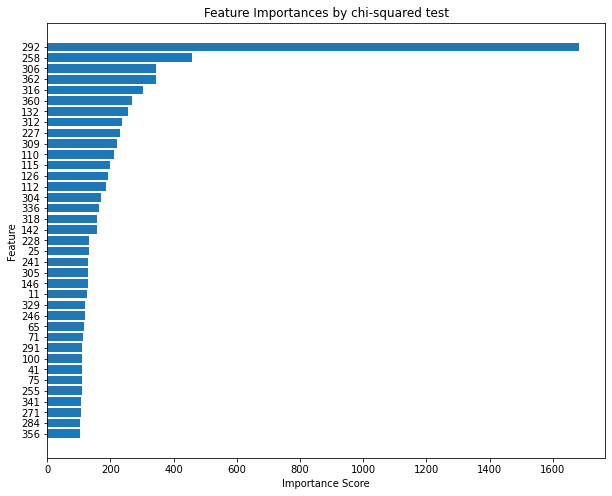

In [56]:
import matplotlib.pyplot as plt

feature_score_dict_chi2 = dict(sorted(feature_score_dict_chi2.items(), key=lambda x:x[1]))

plt.figure(figsize = (10, 8))
plt.barh(range(len(feature_score_dict_chi2.keys())), feature_score_dict_chi2.values(), align='center')
plt.yticks(range(len(feature_score_dict_chi2.keys())), feature_score_dict_chi2.keys())
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importances by chi-squared test')
plt.show()

In [57]:
imp_dict_chi2 = {}
imp_df_chi2 = pd.DataFrame()
for idx in feature_score_dict_chi2.keys():
  imp_dict_chi2[X_train.columns[idx]] = feature_score_dict_chi2[idx]

imp_df_chi2['feature'] = imp_dict_chi2.keys()
imp_df_chi2['score'] = imp_dict_chi2.values()

imp_df_chi2[['question', 'desc']] = imp_df_chi2['feature'].str.split('_', expand = True)
imp_df_chi2.drop(columns = ['desc'], inplace = True)
imp_df_chi2 = imp_df_chi2[['feature', 'question', 'score']]

imp_df_chi2

,feature,question,score
0,"Q25_10,000 or more employees",Q25,102.370041
1,Q4_Spain,Q4,104.251691
2,Q4_Nigeria,Q4,106.706934
3,Q24_Academics/Education,Q24,107.093250
4,Q4_Germany,Q4,108.453046
5,Q18_3,Q18,108.666996
6,Q14_12,Q14,108.693612
7,Q21_3,Q21,108.855809
8,Q4_UK & Ireland,Q4,109.525089
9,Q17_13,Q17,113.345854


In [58]:
print(np.unique(imp_df_chi2['question']), '\n')
imp_df_chi2['question'].value_counts()

['Q11' 'Q12' 'Q13' 'Q14' 'Q16' 'Q17' 'Q18' 'Q2' 'Q21' 'Q23' 'Q24' 'Q25'
 'Q27' 'Q28' 'Q31' 'Q33' 'Q34' 'Q35' 'Q4'] 



Q4     8
Q11    4
Q16    3
Q35    2
Q23    2
Q28    2
Q2     2
Q27    2
Q17    2
Q12    1
Q21    1
Q13    1
Q14    1
Q18    1
Q24    1
Q33    1
Q31    1
Q34    1
Q25    1
Name: question, dtype: int64

## Mutual Information Feature Selection

In [59]:
# Feature selection using information gain
from sklearn.feature_selection import mutual_info_classif

def fs_minfo(X_train, y_train, X_test):
 minfo_fs = SelectKBest(score_func=mutual_info_classif, k='all')
 minfo_fs.fit(X_train, y_train)
 X_train_fs = minfo_fs.transform(X_train)
 X_test_fs = minfo_fs.transform(X_test)
 return X_train_fs, X_test_fs, minfo_fs

In [60]:
X_train_fs, X_test_fs, minfo_fs = fs_minfo(X_train, y_train, X_test)

In [61]:
print(np.min(minfo_fs.scores_), np.max(minfo_fs.scores_))
percentile_90_minfo = np.percentile(minfo_fs.scores_, 90)

top_10_percentile_values = minfo_fs.scores_[minfo_fs.scores_ >= percentile_90_minfo]
top_10_percentile_values.shape

0.0 0.20386939122704284


(37,)

In [62]:
feature_score_dict_minfo = {}

for i in range(len(minfo_fs.scores_)):
  if minfo_fs.scores_[i] >= percentile_90_minfo:
    feature_score_dict_minfo[i] = minfo_fs.scores_[i]
    # print('Feature %d: %f' % (i, minfo_fs.scores_[i]))

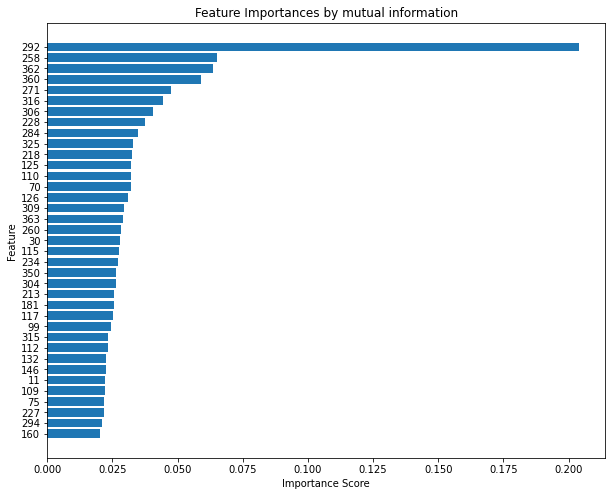

In [63]:
import matplotlib.pyplot as plt

feature_score_dict_minfo = dict(sorted(feature_score_dict_minfo.items(), key=lambda x:x[1]))

plt.figure(figsize = (10, 8))
plt.barh(range(len(feature_score_dict_minfo.keys())), feature_score_dict_minfo.values(), align='center')
plt.yticks(range(len(feature_score_dict_minfo.keys())), feature_score_dict_minfo.keys())
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importances by mutual information')
plt.show()

In [64]:
imp_dict_minfo = {}
imp_df_minfo = pd.DataFrame()
for idx in feature_score_dict_minfo.keys():
  imp_dict_minfo[X_train.columns[idx]] = feature_score_dict_minfo[idx]

imp_df_minfo['feature'] = imp_dict_minfo.keys()
imp_df_minfo['score'] = imp_dict_minfo.values()

imp_df_minfo[['question', 'desc']] = imp_df_minfo['feature'].str.split('_', expand = True)
imp_df_minfo.drop(columns = ['desc'], inplace = True)
imp_df_minfo = imp_df_minfo[['feature', 'question', 'score']]

imp_df_minfo

,feature,question,score
0,Q36_9,Q36,0.020194
1,Q4_Viet Nam,Q4,0.020874
2,Q2_22-24,Q2,0.021581
3,Q18_3,Q18,0.021890
4,Q28_2,Q28,0.021998
5,Q12_9,Q12,0.022184
6,Q35_10,Q35,0.022357
7,Q34_3,Q34,0.022440
8,Q28_5,Q28,0.023341
9,Q16_4-5 years,Q16,0.023372


In [65]:
print(np.unique(imp_df_minfo['question']), '\n')
imp_df_minfo['question'].value_counts()

['Q11' 'Q12' 'Q14' 'Q16' 'Q17' 'Q18' 'Q2' 'Q21' 'Q22' 'Q24' 'Q27' 'Q28'
 'Q31' 'Q33' 'Q34' 'Q35' 'Q36' 'Q38' 'Q4' 'Q41' 'Q42'] 



Q4     6
Q31    3
Q11    3
Q2     3
Q28    3
Q27    3
Q16    2
Q42    1
Q17    1
Q33    1
Q14    1
Q24    1
Q36    1
Q41    1
Q38    1
Q21    1
Q34    1
Q35    1
Q12    1
Q18    1
Q22    1
Name: question, dtype: int64

Based on our feature selection algorithm, some of the questions that are considered most important are

`(Q4) In which country do you currently reside?`

`(Q11) For how many years have you been writing code and/or programming?`

`(Q16) For how many years have you used machine learning methods?`

While Question 4 might indicate the demographic aspects of a person's yearly compensation (different countries have different levels of compensation due to different currencies which here are converted to $USD), Questions 11 and 16 are directly indicating a person's experience level which definitely afects their yearly compensation. This validates our feature selection methods, the following cells show the selected features/questions which will be used for training our ordinal classifier

## Selecting the Features

In [66]:
training_features = imp_df_chi2['feature'].to_list()
training_features

['Q25_10,000 or more employees',
 'Q4_Spain',
 'Q4_Nigeria',
 'Q24_Academics/Education',
 'Q4_Germany',
 'Q18_3',
 'Q14_12',
 'Q21_3',
 'Q4_UK & Ireland',
 'Q17_13',
 'Q17_7',
 'Q4_Canada',
 'Q23_Data Analyst (Business, Marketing, Financial, Quantitative, etc)',
 'Q12_9',
 'Q35_10',
 'Q11_10-20 years',
 'Q4_Australia',
 'Q13_9',
 'Q2_25-29',
 'Q35_6',
 'Q16_Under 1 year',
 'Q23_Manager (Program, Project, Operations, Executive-level, etc)',
 'Q11_1-3 years',
 'Q28_5',
 'Q33_1',
 'Q31_1',
 'Q28_3',
 'Q11_< 1 years',
 'Q2_22-24',
 'Q16_10-20 years',
 'Q34_3',
 'Q27_No (we do not use ML methods)',
 'Q16_5-10 years',
 'Q27_We have well established ML methods (i.e., models in production for more than 2 years)',
 'Q11_20+ years',
 'Q4_India',
 'Q4_USA']

In [67]:
X_train_final = X_train[training_features]
X_train_final

,"Q25_10,000 or more employees",Q4_Spain,Q4_Nigeria,Q24_Academics/Education,Q4_Germany,Q18_3,Q14_12,Q21_3,Q4_UK & Ireland,Q17_13,...,Q11_< 1 years,Q2_22-24,Q16_10-20 years,Q34_3,Q27_No (we do not use ML methods),Q16_5-10 years,"Q27_We have well established ML methods (i.e., models in production for more than 2 years)",Q11_20+ years,Q4_India,Q4_USA
958,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3975,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7753,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [68]:
X_test_final = X_test[training_features]
X_test_final

,"Q25_10,000 or more employees",Q4_Spain,Q4_Nigeria,Q24_Academics/Education,Q4_Germany,Q18_3,Q14_12,Q21_3,Q4_UK & Ireland,Q17_13,...,Q11_< 1 years,Q2_22-24,Q16_10-20 years,Q34_3,Q27_No (we do not use ML methods),Q16_5-10 years,"Q27_We have well established ML methods (i.e., models in production for more than 2 years)",Q11_20+ years,Q4_India,Q4_USA
6912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7328,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6742,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5075,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7109,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1543,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1038,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# Implementing Ordinal Logistic Regression with 10-Fold Cross Validation

As explained in the lectures, Ordinal Logistic Regression is implemented by fitting k-1 classifiers for k ordinal classes considering binary classification with every oridnal class as one class and the rest of the classes as a whole another class.

To implement this I have applied a tutorial found here:

https://towardsdatascience.com/simple-trick-to-train-an-ordinal-regression-with-any-classifier-6911183d2a3c

whose source code can be found here:

https://github.com/mosh98/Ordinal_Classifier/blob/master/Ordinal_Classifier.py

I have modified this file to add functions I will need later in this notebook

I am importing this python file as a module for Ordinal Classification which can be used with any sci-kit learn classification model. It clevers creates the required number classifiers, handles fitting of these models and carries out the required probability calculations. The predict_proba method of the Ordinal Cllassifier class (similar to the sci-kit learn method) generates the probabilites for the ordinal classes and the predictions are done by simply performing an argmax of the probabilities



In [69]:
!mv /content/MIE1624_Assignment2/Ordinal_Classifier.py /content/Ordinal_Classifier.py
!mv /content/MIE1624_Assignment2/main.py /content/main.py

Since, all of the features are binary variables there is no need to scale them, they are already on the same comparable scale

In [70]:
import Ordinal_Classifier as OC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


model = OC.OrdinalClassifier(LogisticRegression(random_state = 42))
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_train_final)

for C in [0.01,0.05,0.1,0.5,1]:

  print('C Value: ', float(C), '\n')
  model = OC.OrdinalClassifier(LogisticRegression(C=C, max_iter = 1000, random_state = 42))
  accuracy = np.zeros(10)
  np_idx = 0

  for train_idx, val_idx in kfold.split(X_train_final):
    X_tr, X_val = X_train_final.values[train_idx], X_train_final.values[val_idx]
    y_tr, y_val = y_train.values[train_idx], y_train.values[val_idx]
    
    model.fit(X_tr, y_tr)
    
    predictions = model.predict(X_val)
    
    TN = confusion_matrix(y_val, predictions)[0][0]
    FP = confusion_matrix(y_val, predictions)[0][1]
    FN = confusion_matrix(y_val, predictions)[1][0]
    TP = confusion_matrix(y_val, predictions)[1][1]
    total = TN + FP + FN + TP
    ACC = (TP + TN) / float(total)
    # ACC = accuracy_score(y_val, predictions)
    
    accuracy[np_idx] = ACC*100
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC,3)))   

  print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)), '\n')

C Value:  0.01 

Fold 1: Accuracy: 0.821%
Fold 2: Accuracy: 0.764%
Fold 3: Accuracy: 0.825%
Fold 4: Accuracy: 0.839%
Fold 5: Accuracy: 0.763%
Fold 6: Accuracy: 0.719%
Fold 7: Accuracy: 0.783%
Fold 8: Accuracy: 0.77%
Fold 9: Accuracy: 0.74%
Fold 10: Accuracy: 0.812%
Average Score: 78.362%(3.751%) 

C Value:  0.05 

Fold 1: Accuracy: 0.821%
Fold 2: Accuracy: 0.768%
Fold 3: Accuracy: 0.829%
Fold 4: Accuracy: 0.843%
Fold 5: Accuracy: 0.767%
Fold 6: Accuracy: 0.717%
Fold 7: Accuracy: 0.774%
Fold 8: Accuracy: 0.776%
Fold 9: Accuracy: 0.743%
Fold 10: Accuracy: 0.815%
Average Score: 78.541%(3.823%) 

C Value:  0.1 

Fold 1: Accuracy: 0.821%
Fold 2: Accuracy: 0.77%
Fold 3: Accuracy: 0.827%
Fold 4: Accuracy: 0.843%
Fold 5: Accuracy: 0.765%
Fold 6: Accuracy: 0.727%
Fold 7: Accuracy: 0.773%
Fold 8: Accuracy: 0.779%
Fold 9: Accuracy: 0.749%
Fold 10: Accuracy: 0.813%
Average Score: 78.64%(3.55%) 

C Value:  0.5 

Fold 1: Accuracy: 0.818%
Fold 2: Accuracy: 0.774%
Fold 3: Accuracy: 0.821%
Fold 4: Accu

Considering the hyperparameter 'C' (inverse of the regularization strength) for different values of C the fold accuracies are very similar, meaning the variance of fold accuracies is low (3.8% - 4.0%). Considering the bias-variance tradeoff, since for different values of C, the variances of fold accuracies are considerably similar, the model with higher accuracy (C = 0.5) is a better model

In [71]:
model = OC.OrdinalClassifier(LogisticRegression(random_state = 42))
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_train_final)

for solver in ['newton-cg','lbfgs','liblinear','sag']:

  print('Solver: ', str(solver), '\n')
  model = OC.OrdinalClassifier(LogisticRegression(solver=solver, max_iter = 1000, random_state = 42))
  accuracy = np.zeros(10)
  np_idx = 0

  for train_idx, val_idx in kfold.split(X_train_final):
    X_tr, X_val = X_train_final.values[train_idx], X_train_final.values[val_idx]
    y_tr, y_val = y_train.values[train_idx], y_train.values[val_idx]
    
    model.fit(X_tr, y_tr)
    
    predictions = model.predict(X_val)
    
    TN = confusion_matrix(y_val, predictions)[0][0]
    FP = confusion_matrix(y_val, predictions)[0][1]
    FN = confusion_matrix(y_val, predictions)[1][0]
    TP = confusion_matrix(y_val, predictions)[1][1]
    total = TN + FP + FN + TP
    ACC = (TP + TN) / float(total)
    
    accuracy[np_idx] = ACC*100
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC,3)))   

  print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)), '\n')

Solver:  newton-cg 

Fold 1: Accuracy: 0.818%
Fold 2: Accuracy: 0.778%
Fold 3: Accuracy: 0.821%
Fold 4: Accuracy: 0.832%
Fold 5: Accuracy: 0.76%
Fold 6: Accuracy: 0.725%
Fold 7: Accuracy: 0.771%
Fold 8: Accuracy: 0.778%
Fold 9: Accuracy: 0.747%
Fold 10: Accuracy: 0.812%
Average Score: 78.427%(3.332%) 

Solver:  lbfgs 

Fold 1: Accuracy: 0.818%
Fold 2: Accuracy: 0.778%
Fold 3: Accuracy: 0.821%
Fold 4: Accuracy: 0.832%
Fold 5: Accuracy: 0.76%
Fold 6: Accuracy: 0.725%
Fold 7: Accuracy: 0.771%
Fold 8: Accuracy: 0.778%
Fold 9: Accuracy: 0.747%
Fold 10: Accuracy: 0.812%
Average Score: 78.427%(3.332%) 

Solver:  liblinear 

Fold 1: Accuracy: 0.818%
Fold 2: Accuracy: 0.778%
Fold 3: Accuracy: 0.821%
Fold 4: Accuracy: 0.826%
Fold 5: Accuracy: 0.76%
Fold 6: Accuracy: 0.725%
Fold 7: Accuracy: 0.771%
Fold 8: Accuracy: 0.778%
Fold 9: Accuracy: 0.747%
Fold 10: Accuracy: 0.812%
Average Score: 78.374%(3.26%) 

Solver:  sag 

Fold 1: Accuracy: 0.818%
Fold 2: Accuracy: 0.778%
Fold 3: Accuracy: 0.821%
Fol

Considering the hyperparameter 'solver', for different solvers the accuracies are exactly the same, hence there is no comparison

# Hyperparameter Tuning and Metric Selection

Hyperparameters: The significant hyperparameters of the Logistic Regression model are as follows:

penalty : {‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’  (**Regularization Penalty**)

C : float, default=1.0  (**Inverse of regularization strength**)

tol : float, default=1e-4 (**Tolerance for stopping criteria**)

fit_intercept : bool, default=True
(**Specifies if a constant (a.k.a. bias or intercept) should be added**)

solver : {‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’
(**Algorithm to use in the optimization problem**)

max_iter : int, default=100
(**Maximum number of iterations taken for the solvers to converge**)

from these hyperparameters we are going to focus only on `C` and `solver` for the sake of hyperparameter tuning since different combinations of strength of regularization and the optimization algorithm used can effectively change the model parameters

In ordinal logistic regression, the dependent variable is ordered, meaning that the categories have a specific rank order, and the distance between categories may not be equal. For example, consider a survey question asking respondents to rate their satisfaction with a product on a scale from 1 to 5, with 1 being "very unsatisfied" and 5 being "very satisfied." In this case, the distance between "very unsatisfied" and "unsatisfied" may not be the same as the distance between "satisfied" and "very satisfied."

Accuracy, which is the proportion of correct predictions out of all predictions, is not a suitable performance metric for ordinal logistic regression because it does not account for the ordered nature of the dependent variable. Specifically, accuracy treats all misclassifications equally, regardless of how far off they are from the true category.

In [72]:
model = OC.OrdinalClassifier(LogisticRegression(random_state = 42))
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_train_final)

best_model = model
best_params = {}
best_f1_score = 0
best_std = 0

for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
    for solver in ['newton-cg','lbfgs','liblinear','sag']:
        
        model = OC.OrdinalClassifier(LogisticRegression(C=C, solver=solver, max_iter = 1000, random_state = 42))
        f1_scores = np.zeros(10)
        np_idx = 0
        
        for train_idx, val_idx in kfold.split(X_train_final):
            X_tr, X_val = X_train_final.values[train_idx], X_train_final.values[val_idx]
            y_tr, y_val = y_train.values[train_idx], y_train.values[val_idx]

            model.fit(X_tr, y_tr)

            predictions = model.predict(X_val)
            F1_Score = f1_score(y_val, predictions, average = 'weighted')

            f1_scores[np_idx] = F1_Score
            np_idx += 1
        
        if np.mean(f1_scores) > best_f1_score:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_f1_score = np.mean(f1_scores)
            best_std = np.std(f1_scores)

print (best_params)
print ("Best Score: {}%({}%)".format(round(best_f1_score,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_f1_score,3),round(best_std,3)))

{'C': 100, 'solver': 'sag'}
Best Score: 0.294%(0.02%)

The optimal log model uses C=100, and a sag solver, and has a cross validation score of 0.294% with a standard deviation of 0.02%


To visualize feature importance, we will look at the absolute values of model coefficeints, larger absolute value of the model coefficient for a feature indicates higher importance.

In [73]:
feature_scores = np.abs(best_model.coef_())
feature_scores = feature_scores[0]
feature_scores

array([0.5561831 , 0.09619113, 2.49565062, 0.84434718, 0.23566749,
       0.12936463, 0.14106518, 0.28007636, 1.81014194, 0.08538044,
       0.22454133, 1.89407095, 0.47628531, 0.05929129, 0.34203194,
       0.20180404, 3.32992946, 0.14181727, 0.67852204, 0.17287968,
       0.13930349, 0.91605059, 0.23150112, 0.19584871, 0.06385957,
       0.20892394, 0.03301944, 0.22654865, 1.27922328, 0.69361657,
       0.16687303, 0.67079717, 0.66751121, 0.43669115, 0.65985983,
       0.74650881, 3.12326304])

In [74]:
best_model_fs_dict = {}

for i in range(len(X_train_final.columns)):
  best_model_fs_dict[X_train_final.columns[i]] = feature_scores[i]

best_model_fs_dict

{'Q25_10,000 or more employees': 0.556183096935885,
 'Q4_Spain': 0.0961911314016584,
 'Q4_Nigeria': 2.495650618217989,
 'Q24_Academics/Education': 0.8443471753993316,
 'Q4_Germany': 0.23566748920802352,
 'Q18_3': 0.1293646313680292,
 'Q14_12': 0.141065177834671,
 'Q21_3': 0.280076359255474,
 'Q4_UK & Ireland': 1.8101419381875687,
 'Q17_13': 0.08538044041901689,
 'Q17_7': 0.22454132599113183,
 'Q4_Canada': 1.89407095039558,
 'Q23_Data Analyst (Business, Marketing, Financial, Quantitative, etc)': 0.47628531154169307,
 'Q12_9': 0.059291288400880944,
 'Q35_10': 0.3420319441690661,
 'Q11_10-20 years': 0.2018040366386852,
 'Q4_Australia': 3.3299294620445976,
 'Q13_9': 0.14181726973330164,
 'Q2_25-29': 0.678522035238707,
 'Q35_6': 0.17287968128887332,
 'Q16_Under 1 year': 0.13930349242048437,
 'Q23_Manager (Program, Project, Operations, Executive-level, etc)': 0.9160505901620158,
 'Q11_1-3 years': 0.23150112392307512,
 'Q28_5': 0.19584871356936423,
 'Q33_1': 0.06385957208178807,
 'Q31_1': 0.2

In [75]:
# list(features.columns).index(list(best_model_fs_dict.keys())[-1])
fi_plot = {}

for i in range(len(best_model_fs_dict)):
  fi_plot[list(features.columns).index(list(best_model_fs_dict.keys())[i])] = best_model_fs_dict[list(best_model_fs_dict.keys())[i]]

fi_plot

{356: 0.556183096935885,
 284: 0.0961911314016584,
 271: 2.495650618217989,
 341: 0.8443471753993316,
 255: 0.23566748920802352,
 75: 0.1293646313680292,
 41: 0.141065177834671,
 100: 0.280076359255474,
 291: 1.8101419381875687,
 71: 0.08538044041901689,
 65: 0.22454132599113183,
 246: 1.89407095039558,
 329: 0.47628531154169307,
 11: 0.059291288400880944,
 146: 0.3420319441690661,
 305: 0.2018040366386852,
 241: 3.3299294620445976,
 25: 0.14181726973330164,
 228: 0.678522035238707,
 142: 0.17287968128887332,
 318: 0.13930349242048437,
 336: 0.9160505901620158,
 304: 0.23150112392307512,
 112: 0.19584871356936423,
 126: 0.06385957208178807,
 115: 0.2089239418387233,
 110: 0.03301943740074883,
 309: 0.22654864812483672,
 227: 1.2792232789787088,
 312: 0.6936165705202288,
 132: 0.16687303492228242,
 360: 0.6707971705643149,
 316: 0.6675112135904003,
 362: 0.43669114751923216,
 306: 0.6598598316850846,
 258: 0.7465088149448923,
 292: 3.123263043068041}

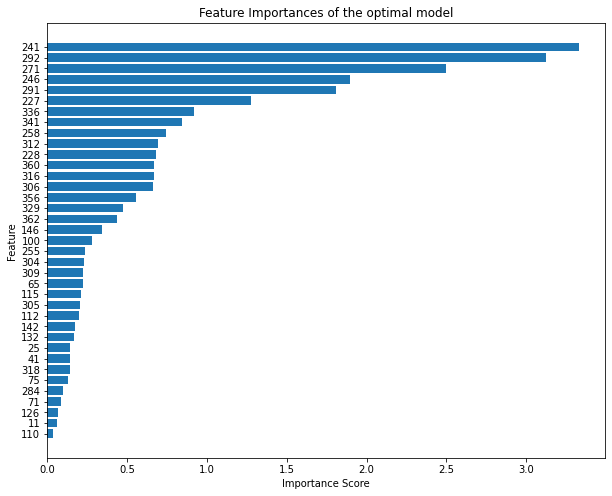

In [76]:
fi_plot = dict(sorted(fi_plot.items(), key=lambda x:x[1]))

plt.figure(figsize = (10, 8))
plt.barh(range(len(fi_plot.keys())), fi_plot.values(), align='center')
plt.yticks(range(len(fi_plot.keys())), fi_plot.keys())
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importances of the optimal model')
plt.show()

The feature importance bar chart obtained earlier and the bar chart from the fitted optimal model are very similar to each other and have almost the same feature in decreasing order of feature importance

# Testing & Discussion

In [77]:
optimal_model = OC.OrdinalClassifier(LogisticRegression(C = 100, solver = 'sag', max_iter = 1000,  random_state = 42))

optimal_model.fit(X_train_final.to_numpy(), y_train)

In [78]:
y_train_pred = optimal_model.predict(X_train_final.to_numpy())
training_f1_score = f1_score(y_train, y_train_pred, average = 'weighted')
training_f1_score

0.323849476411385

In [79]:
y_test_pred = optimal_model.predict(X_test_final.to_numpy())
test_f1_score = f1_score(y_test, y_test_pred, average = 'weighted')
test_f1_score

0.28215918501671944

Looking just at the magnitude of f1 scores we can say that the model is not very efficient in predicting the salary bucket of a respondent based on the questions selected. In terms of underfitting/overfitting, it can be deduced that the model is overfitting since the f1 score for the training set is higher than the f1 score for test set. The performance of the model may be increased even further by engineering new features or may be by completely changing the inherent classifier from logistic regression to any other classifer (neural networks maybe since all features are binary). We didn't consider other hyperparameters that might have an impact on model performance

In [80]:
y_train_pred = pd.Series(y_train_pred).astype(float)
y_test_pred = pd.Series(y_test_pred).astype(float)

true_counts_train = y_train.value_counts()
pred_counts_train = y_train_pred.value_counts()
true_counts_test = y_test.value_counts()
pred_counts_test = y_test_pred.value_counts()

In [81]:
true_counts_train = true_counts_train.sort_index()
pred_counts_train = pred_counts_train.sort_index()
true_counts_test = true_counts_test.sort_index()
pred_counts_test = pred_counts_test.sort_index()

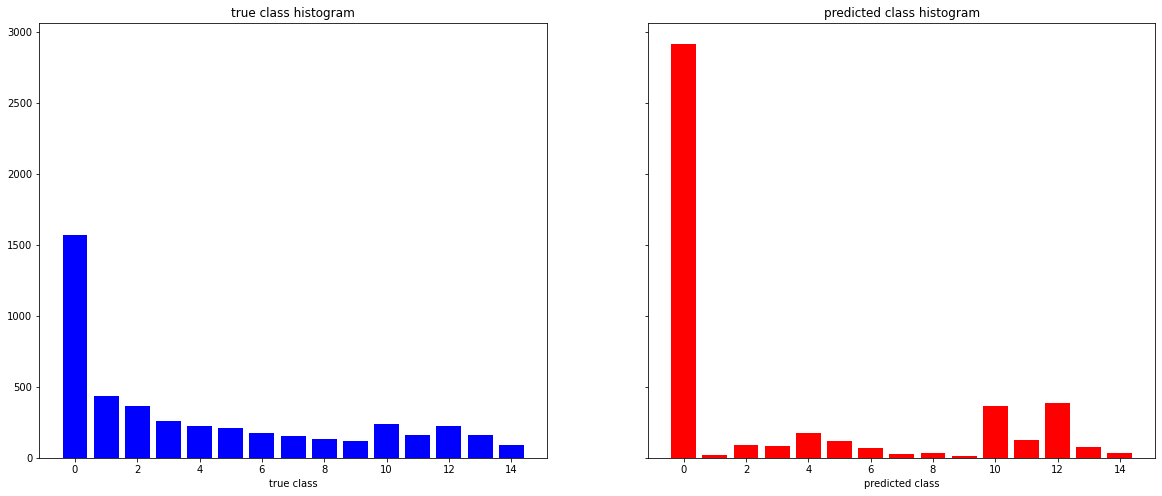

In [82]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8), sharey = True)
ax1.bar(true_counts_train.index, true_counts_train.values, color = 'blue', label = 'true')
ax1.set_xlabel('true class')
ax1.set_title('true class histogram')
ax2.bar(pred_counts_train.index, pred_counts_train.values, color = 'red', label = 'pred')
ax2.set_xlabel('predicted class')
ax2.set_title('predicted class histogram')
plt.show()

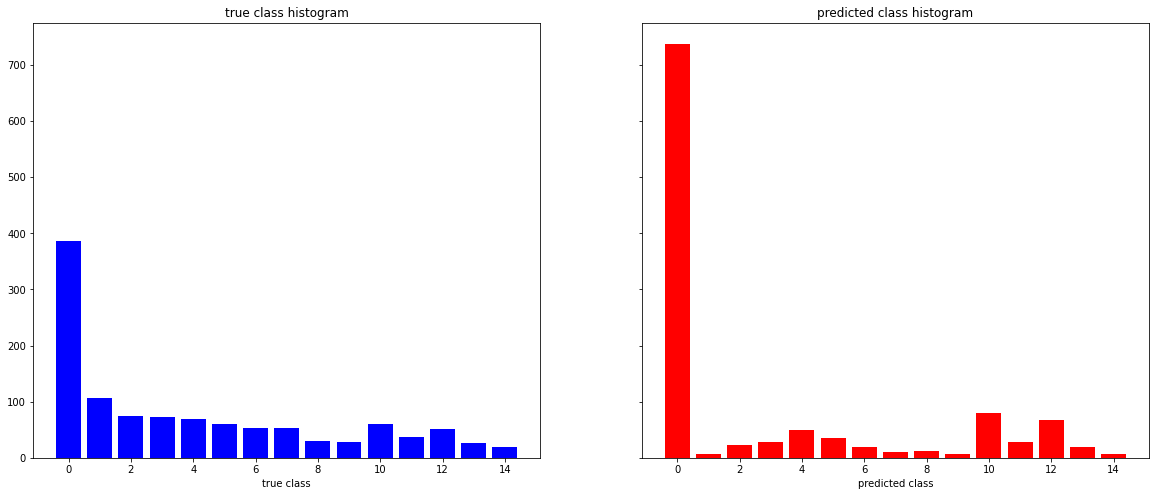

In [83]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8), sharey = True)
ax1.bar(true_counts_test.index, true_counts_test.values, color = 'blue', label = 'true')
ax1.set_xlabel('true class')
ax1.set_title('true class histogram')
ax2.bar(pred_counts_test.index, pred_counts_test.values, color = 'red', label = 'pred')
ax2.set_xlabel('predicted class')
ax2.set_title('predicted class histogram')
plt.show()